In [9]:
import pandas as pd
import numpy as np
from sklearn import *
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [51]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [52]:
df = (df - df.mean())/df.std()

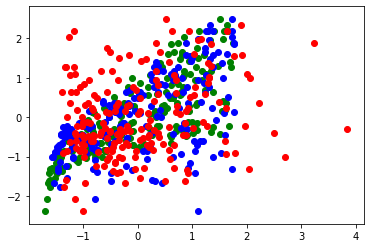

In [53]:
plt.scatter(df.TV, df.Sales, color='green')
plt.scatter(df.Radio, df.Sales, color='blue')
plt.scatter(df.Newspaper, df.Sales, color = 'red')
plt.show()

In [127]:
lr = 0.01
iters = 1000
X = df.loc[:, ['TV', 'Radio', 'Newspaper']]
Y = df.loc[:, 'Sales']
# Additional column for theta_0
intercept = pd.Series(np.ones((m)))
X['intercept'] = intercept
X = np.array(X)
Y = np.array(Y)
Y = Y[:, np.newaxis]
# number of samples
m = X.shape[0]
# number of features
n = X.shape[1]


In [128]:
print(X.shape, Y.shape, theta.shape)

(200, 4) (200, 1) (4, 1)


In [132]:
def compute_cost(y, y_hat, m):
    err_2 = (y_hat-y).T.dot((y_hat-y))
    return (1/(2*m)) * err_2

In [133]:
def grad_des(X, Y):
    gd_df = pd.DataFrame(columns = ['theta', 'cost'])
    theta = np.zeros((4, 1))
    for i in range(iters):
        Y_hat = np.matmul(X, theta)
        grad = (1./m)*np.matmul(X.T, (Y_hat-Y))
        theta = theta - lr*grad
        cost = compute_cost(Y, Y_hat, m)
        gd_df.loc[i] = [theta, cost]
    return gd_df

In [134]:
out_df = grad_des(X, Y)

In [140]:
out_df.iloc[-1].theta

array([[ 7.53028970e-01],
       [ 5.36055111e-01],
       [-3.89429686e-03],
       [ 2.77650125e-16]])

In [141]:
out_df.iloc[-1].cost

array([[0.05113783]])

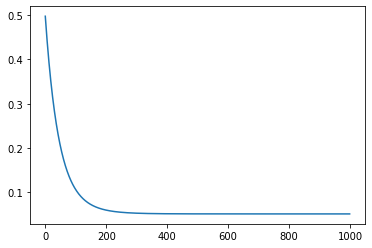

In [136]:
plt.plot(out_df.cost)
plt.show()

In [142]:
lin_reg = sklearn.linear_model.LinearRegression()

In [143]:
lin_reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [144]:
lin_reg.intercept_

array([2.66268857e-16])

In [145]:
lin_reg.coef_

array([[ 0.75306591,  0.53648155, -0.00433069,  0.        ]])